In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image, ImageDraw

In [2]:
data = pd.read_csv('10fold/pneumonia-test-0', sep=';')
data2 = pd.read_csv('10fold/pneumonia-train-0', sep=';')
data.append(data2, ignore_index=True)
data.reset_index(inplace=True, drop=True)
data_empty = data.loc[data['Target'] == 0]

In [3]:
def draw_rectangle(image, x_min, y_min, width, height, inner_color=None, out_color='yellow',
                   size=1):
    draw = ImageDraw.Draw(image)
    coordinates = [x_min, y_min, x_min + width + 1, y_min + height + 1]
    draw.rectangle(xy=coordinates, width=size, outline=out_color, fill=inner_color)
    return image

def draw_mask(image, x_min, y_min, width, height):
    draw = ImageDraw.Draw(image)
    coordinates = [x_min, y_min, x_min + width + 1, y_min + height + 1]
    draw.rectangle(xy=coordinates, width=0, outline=None, fill='white')
    return image

def show_grid(images, images_per_line=3):
    #creates a new empty image, RGB mode, and size 400 by 400.
    width, height = images[0].size
    num_lines = int(np.ceil(len(images) / images_per_line))
    grid_width = int(width * images_per_line)
    grid_height = int(height * num_lines)
    background = Image.new('RGB', (grid_width, grid_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    for i in range(num_lines):
        for j in range(images_per_line):
            idx = i * images_per_line + j
            image = images[idx]
            x = j * width
            y = i * height
            #paste the image at location i,j:
            background.paste(image, (x,y))
    
    return background

In [14]:
image_dir = 'images/train'
output_dir = 'images/masks'
for filename in os.listdir(image_dir):
    # gets bboxes from a image
    name = os.path.basename(filename)
    print(name)
    boxes = data.loc[data['patientId'] == name[:-4]]
    
    image = Image.open(os.path.join(image_dir, name))
    img_width, img_height = image.size
    # image = Image.new(mode='RGB', size=(img_width, img_height), color='black')  
    for j in range(len(boxes)):
        example = boxes.iloc[j]
        if example['Target'] == 1:
            image = draw_rectangle(image=image,
                                  x_min=example['x'],
                                  y_min=example['y'],
                                  width=example['width'],
                                  height=example['height'],
                                   inner_color='black',
                                   out_color=None)
        else:
            size = np.random.randint(567)
            if size < 317:  # case boxes on both lungs
                x_center = np.random.normal(loc=521.238170,
                                            scale=56.974727)
                y_center = np.random.normal(loc=532.476341,
                                            scale=102.039171)
                width = np.random.normal(loc=607.864353,
                                         scale=90.521505)
                height = np.random.normal(loc=419.230284,
                                          scale=149.757295)
            else:  # case single box on one lung
                x_center = np.random.normal(loc=487.87200,
                                            scale=204.95885)
                y_center = np.random.normal(loc=549.622000,
                                            scale=117.287902)
                width = np.random.normal(loc=207.600000,
                                         scale=62.610737)
                height = np.random.normal(loc=129.575896,
                                          scale=60.000000)
            width = int(width)
            height = int(height)
            x_min = int(x_center - width/2)
            x_max = int(x_center + width/2)
            y_min = int(y_center - height/2)
            y_max = int(y_center + height/2)
            if x_min < 0:
                width += x_min
                x_min = 0
            if x_max > 1023:
                width -= (x_max - 1023)
            if y_min < 0:
                height += height
                y_min = 0
            if y_max > 1023:
                height -= y_max - 1023
            image = draw_rectangle(image=image,
                                   x_min=x_min,
                                   y_min=y_min,
                                   width=width,
                                   height=height,
                                   inner_color='black',
                                   out_color=None)

    image.save(os.path.join(output_dir, name[:-4] + '.png'))

01cc7c75-4498-43ab-b650-5553d0507f76.jpg
068ae297-8397-463e-927e-cb6693aeb8b5.jpg
6495b54d-fceb-4463-8eb0-94dab230e043.jpg
65139428-111f-4e09-82a6-14fafe18cbbe.jpg
0174c4bb-28f5-41e3-a13f-a396badc18bd.jpg
01b56434-4dd9-4994-bcc5-0b70a36e415a.jpg
065b3a2f-1af3-4ebd-a740-9e49f9c685db.jpg
b26151b2-5f68-4af1-9730-4d608dfde81a.jpg
06d5a58d-baf1-4937-bfc3-00db1fb2b1be.jpg
0716e0cf-3822-406e-bfb2-c064cd471019.jpg
05d16b06-ffb2-40ab-b64a-299448999f72.jpg
01fa0f5e-00c3-41cb-b5c7-10600c8633ae.jpg
0499513a-5d48-4cf9-aac8-115e2a52fe1a.jpg
07444c7a-580b-4494-a883-3b33361a24ac.jpg
008c19e8-a820-403a-930a-bc74a4053664.jpg
06e09ebb-cb5b-4c30-8d3a-67a6ec34692b.jpg
b21091fa-70ab-432b-a05d-edfa6674cf9f.jpg
06bc1cfe-23a0-43a4-a01b-dfa10314bbb0.jpg
ff1c8291-32bd-4d9a-8c4e-570dca044bcc.jpg
0717d112-a8e5-46c0-9ba5-902cd9fe8fe1.jpg
040a0743-f663-4746-8224-f0e3bacc7ba5.jpg
0637b804-e693-48d1-8716-f7c63ce6162a.jpg
b1323e3e-2460-4db7-a98e-f810c0004836.jpg
0385fdea-9b37-4039-b10c-d3094f6afdfa.jpg
041bf0ac-a841-4c

Sem nada

/home/luisfelipehsr/IC/Experimentos/bias/deconstructing-bias-skin-lesion/pneumonia


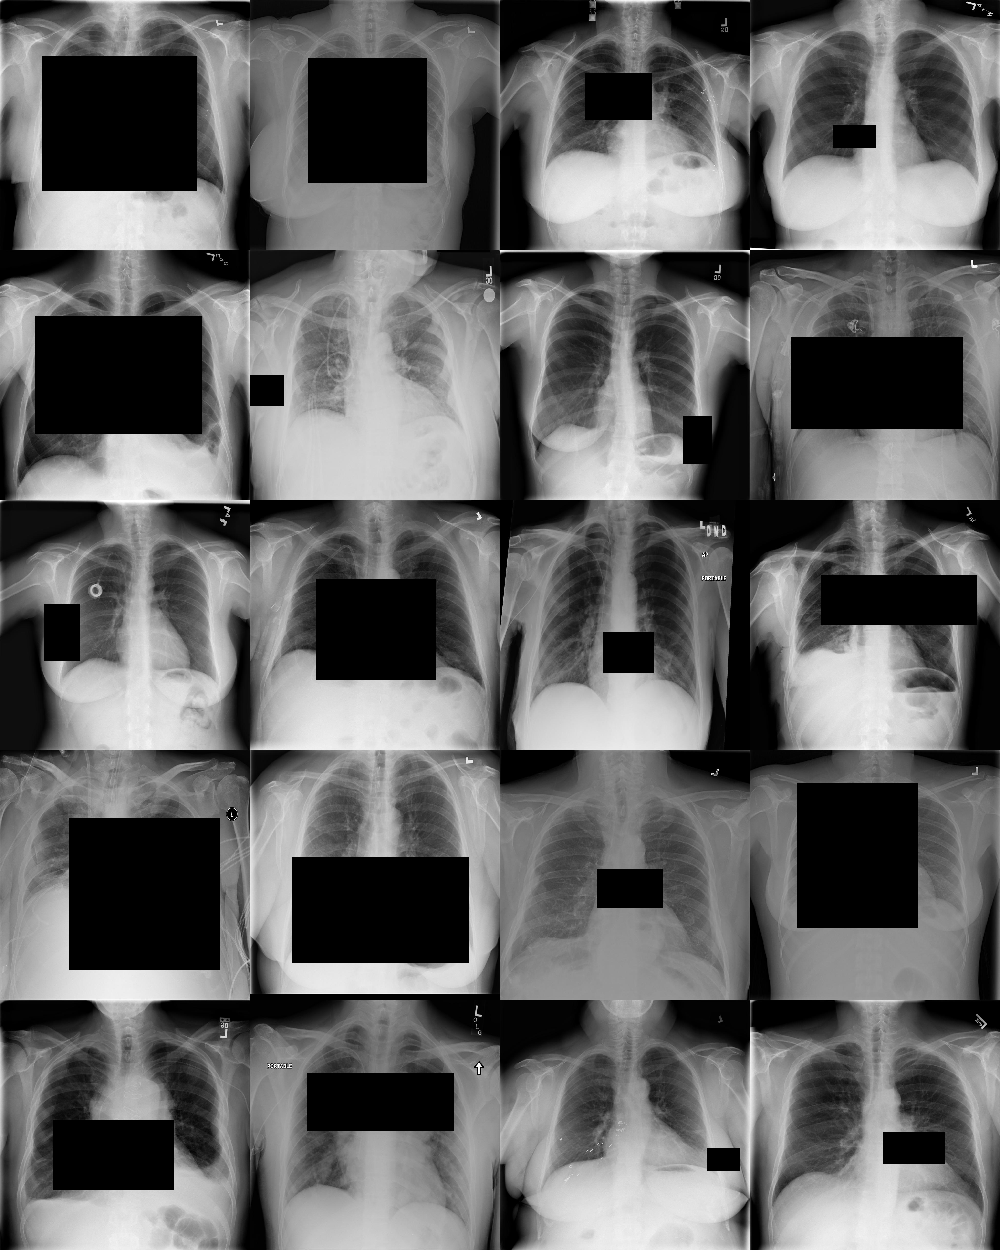

In [21]:
images = []
patients = ['006cec2e-6ce2-4549-bffa-eadfcd1e9970',
             '008c19e8-a820-403a-930a-bc74a4053664',
             '01b56434-4dd9-4994-bcc5-0b70a36e415a',
             '01cc7c75-4498-43ab-b650-5553d0507f76',
             '0385fdea-9b37-4039-b10c-d3094f6afdfa',
             '03d00867-fe6d-47b5-9a14-3f03f736e69a',
             '041bf0ac-a841-4c4a-9f91-45f4b3b34671',
             '052e09c0-6747-4f72-8e71-96fcc489043a',
             '05d16b06-ffb2-40ab-b64a-299448999f72',
             '05f42ea0-fa18-47ba-80a7-e070307300bf',
             '062374a3-6ca1-48d2-aa3c-820053773b54',
             '0638126f-126f-4f53-befe-538ff87597c6',
             '065b3a2f-1af3-4ebd-a740-9e49f9c685db',
             '068ae297-8397-463e-927e-cb6693aeb8b5',
             '0693cf18-a4e1-408a-a5b2-f4cabfe169d3',
             '06bc1cfe-23a0-43a4-a01b-dfa10314bbb0',
             '06e1a29a-6307-4ec2-902e-b379d39d2101',
             '0716e0cf-3822-406e-bfb2-c064cd471019',
             '0717d112-a8e5-46c0-9ba5-902cd9fe8fe1',
             '07444c7a-580b-4494-a883-3b33361a24ac']
print(os.getcwd())
for patientId in patients:
    image = Image.open(os.path.join(output_dir, f"{patientId}.png"))
    images.append(image)
show_grid(images, images_per_line=4).resize((4 * 250, 5 * 250))

Pneumonia

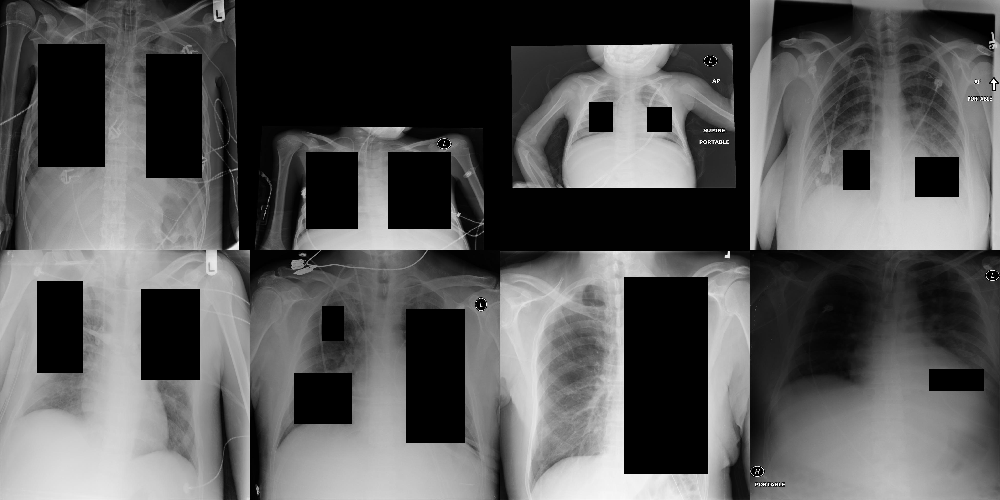

In [27]:
images = []
image_dir = 'images/train'
output_dir = 'images/masks'
for filename in os.listdir(image_dir):
    # gets bboxes from a image
    name = os.path.basename(filename)
    boxes = data.loc[data['patientId'] == name[:-4]]
    
    image = Image.open(os.path.join(output_dir, f"{name[:-4]}.png"))
    img_width, img_height = image.size
    # image = Image.new(mode='RGB', size=(img_width, img_height), color='black')  
    for j in range(len(boxes)):
        if j == 0:
            example = boxes.iloc[j]
            if example['Target'] == 1:
                images.append(image)
show_grid(images[:8], images_per_line=4).resize((4 * 250, 2 * 250))